# 1. Data & Business understanding

**Company wants to understand the driving factor behind loan default, the company can use these indicators for portfolio risk assesmeent**
**Given dataset has three categories**
* 1. Fully Paid
* 2. Default
* 3. Current

**Current loan cannot be tagged as defaulted or repaid, so they can be ignored for the analysis**

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools 
warnings.filterwarnings("ignore")

In [266]:
loan = pd.read_csv("loan.csv",parse_dates=['issue_d'])
loan.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [267]:
loan.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                int64
member_id                         int64
loan_amnt                         int64
funded_amnt                       int64
funded_amnt_inv                   float64
term                              object
int_rate                          object
installment                       float64
grade                             object
sub_grade                         object
emp_title                         object
emp_length                        object
home_ownership                    object
annual_inc                        float64
verification_status               object
issue_d                           object
loan_status                       object
pymnt_plan                        object
url                               object
desc                              object
purpose                           object
title                         

In [268]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# **Comments**

* **There are 39,717 rows and total of 111 columns out of which 87 are numeric columns and 24 are objects**
* **There are many fields with lot of missing values, it needs to be dropped**

#   2. Data Cleaning

## 2.1 Null Values


In [269]:
#Creating a function to find the percentage of missing value by columns

def missing_data(df):
    missing = pd.DataFrame(columns = ['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            percentage = 100*df[col].isna().sum()/df.shape[0]
            missing = missing.append({'category':col,'percentage':percentage},ignore_index = True)    
    return missing


In [270]:
#Passing the Loan dataframe in the user defined function to find out the categories in the data with the percentage of missing values

missing_column = missing_data(loan)         
print(missing_column.sort_values(by = 'percentage',ascending = False))

                          category  percentage
34                  bc_open_to_buy  100.000000
32            acc_open_past_24mths  100.000000
35                         bc_util  100.000000
37              mo_sin_old_il_acct  100.000000
38            mo_sin_old_rev_tl_op  100.000000
39           mo_sin_rcnt_rev_tl_op  100.000000
40                  mo_sin_rcnt_tl  100.000000
41                        mort_acc  100.000000
42            mths_since_recent_bc  100.000000
43        mths_since_recent_bc_dlq  100.000000
44           mths_since_recent_inq  100.000000
45  mths_since_recent_revol_delinq  100.000000
46           num_accts_ever_120_pd  100.000000
47                  num_actv_bc_tl  100.000000
48                 num_actv_rev_tl  100.000000
49                     num_bc_sats  100.000000
50                       num_bc_tl  100.000000
51                       num_il_tl  100.000000
52                   num_op_rev_tl  100.000000
53                   num_rev_accts  100.000000
54           

**1. There are 68 fields with missing values**

**2. Need to check how many columns have more than 50% missing values, we can drop such columns for further analysis**

In [271]:
missing_column_50 = missing_column[missing_column['percentage']>50]
print(missing_column_50)
print("Number of columns with more than 50% missing values are:",len(missing_column_50))

                          category  percentage
4           mths_since_last_delinq   64.662487
5           mths_since_last_record   92.985372
8                     next_pymnt_d   97.129693
11     mths_since_last_major_derog  100.000000
12                annual_inc_joint  100.000000
13                       dti_joint  100.000000
14       verification_status_joint  100.000000
15                    tot_coll_amt  100.000000
16                     tot_cur_bal  100.000000
17                     open_acc_6m  100.000000
18                      open_il_6m  100.000000
19                     open_il_12m  100.000000
20                     open_il_24m  100.000000
21              mths_since_rcnt_il  100.000000
22                    total_bal_il  100.000000
23                         il_util  100.000000
24                     open_rv_12m  100.000000
25                     open_rv_24m  100.000000
26                      max_bal_bc  100.000000
27                        all_util  100.000000
28           

* **There are 57 columns with more than 50% missing values**
* **Will be dropping such fields from the loan dataset**

In [272]:
drop_list = missing_column_50['category'].tolist()
print(drop_list)

['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred

In [273]:
#creating a cleaner dataframe after dropping the misssing columns
loan_new = loan.drop(drop_list,axis=1)

In [274]:
loan_new.shape

(39717, 54)

In [275]:
new_missing = missing_data(loan_new)
print(new_missing.sort_values(by = 'percentage',ascending = False))

                      category  percentage
2                         desc   32.580507
0                    emp_title    6.191303
1                   emp_length    2.706650
9         pub_rec_bankruptcies    1.754916
5                 last_pymnt_d    0.178765
7   collections_12_mths_ex_med    0.140998
8     chargeoff_within_12_mths    0.140998
4                   revol_util    0.125891
10                   tax_liens    0.098195
3                        title    0.027696
6           last_credit_pull_d    0.005036


**Desc - Loan description provided by the borrower is similar to the purpose of the loan, so can be dropped to avoid redundancy**

In [276]:
loan_new.drop(labels = 'desc',axis=1,inplace = True)

**We also noticed that Interest rate is read as string, we need to convert it to float**



In [277]:
##Changing Interest Rate field

def clean_interest(x):   
    if isinstance(x, str):
        return(x.replace('%', '').replace(',', ''))
    return(x)

loan_new['int_rate'] = loan_new['int_rate'].apply(clean_interest).astype('float')



In [278]:
loan_new.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


**Interest Rate has now been changes into float data type**


*  Can get rid of the Loan_status = Current as they are not fully paid or not defaulted
*  Customer behaviour variables are not available at the time of loan application thus can be removed

In [279]:
#Getting rid of the Loan Status = Current
loan_status_exc_curr = loan_new[loan_new['loan_status'] != 'Current']
#Changing the categorical variable loan_sstatus ("fully paid and charged off to numerical for better analysis")
loan_status_exc_curr['loan_status'].replace(['Fully Paid','Charged Off'],[0,1],inplace = True)
loan_status_exc_curr.shape

#Removing customer behaviour variables

#Importing list with customer behaviour fields

cust_behav = pd.read_excel('cust_behav.xlsx')
cust_behav_list = cust_behav['Customer_Behaviour'].tolist()

loan_clean = loan_status_exc_curr.drop(cust_behav_list,axis =1)


loan_clean.shape

(38577, 32)

**32 fields are left after removing the customer behaviour variables from the loan dataset**

In [280]:
loan_object = loan_clean.select_dtypes(include= 'object')
loan_object.shape

(38577, 15)

In [281]:
loan_numerical = loan_clean.select_dtypes(exclude= 'object')
loan_numerical.shape

(38577, 17)

**16 numerical and 16 non-numeric columns are available**

## 2.2 Cleaning non-numerical columns by dropping redundant values

In [282]:
loan_object.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,initial_list_status
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,f
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,f
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,f
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,f
5,36 months,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,f


**emp_title, pymnt_plan, url, title, zip_code, initial_list_status to be removed as they don't have sufficient information for example - zip code or are redundant in case of url it looks like the extension of ID**

## 2.3 Cleaning numerical columns by dropping redundant values

In [284]:
loan_numerical.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38521.0,38577.0,38577.0,38521.0,38577.0,37880.000000,38538.0
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,0.145864,13.272727,0.0,1.0,0.0,0.0,0.0,0.043479,0.0
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,0.352975,6.673044,0.0,0.0,0.0,0.0,0.0,0.204583,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,0.000000,8.130000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,0.000000,13.370000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,0.000000,18.560000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,1.000000,29.990000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


**collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens can be removed as it has all zeroes**
**policy_code can be removed as it has only 1 value**

## 2.4 Removing numeric and non-numeric columns after the result of above analysis

In [285]:
drop_list_new = ['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','policy_code',
                'emp_title','pymnt_plan','url','title','zip_code','initial_list_status']

loan_clean_int = loan_clean.drop(drop_list_new,axis=1)
loan_clean_int.shape

(38577, 20)

**Now  20 fields left after the cleaning**

## 2.5 Performing bi-variate analysis correlation to find out  high correlation fields

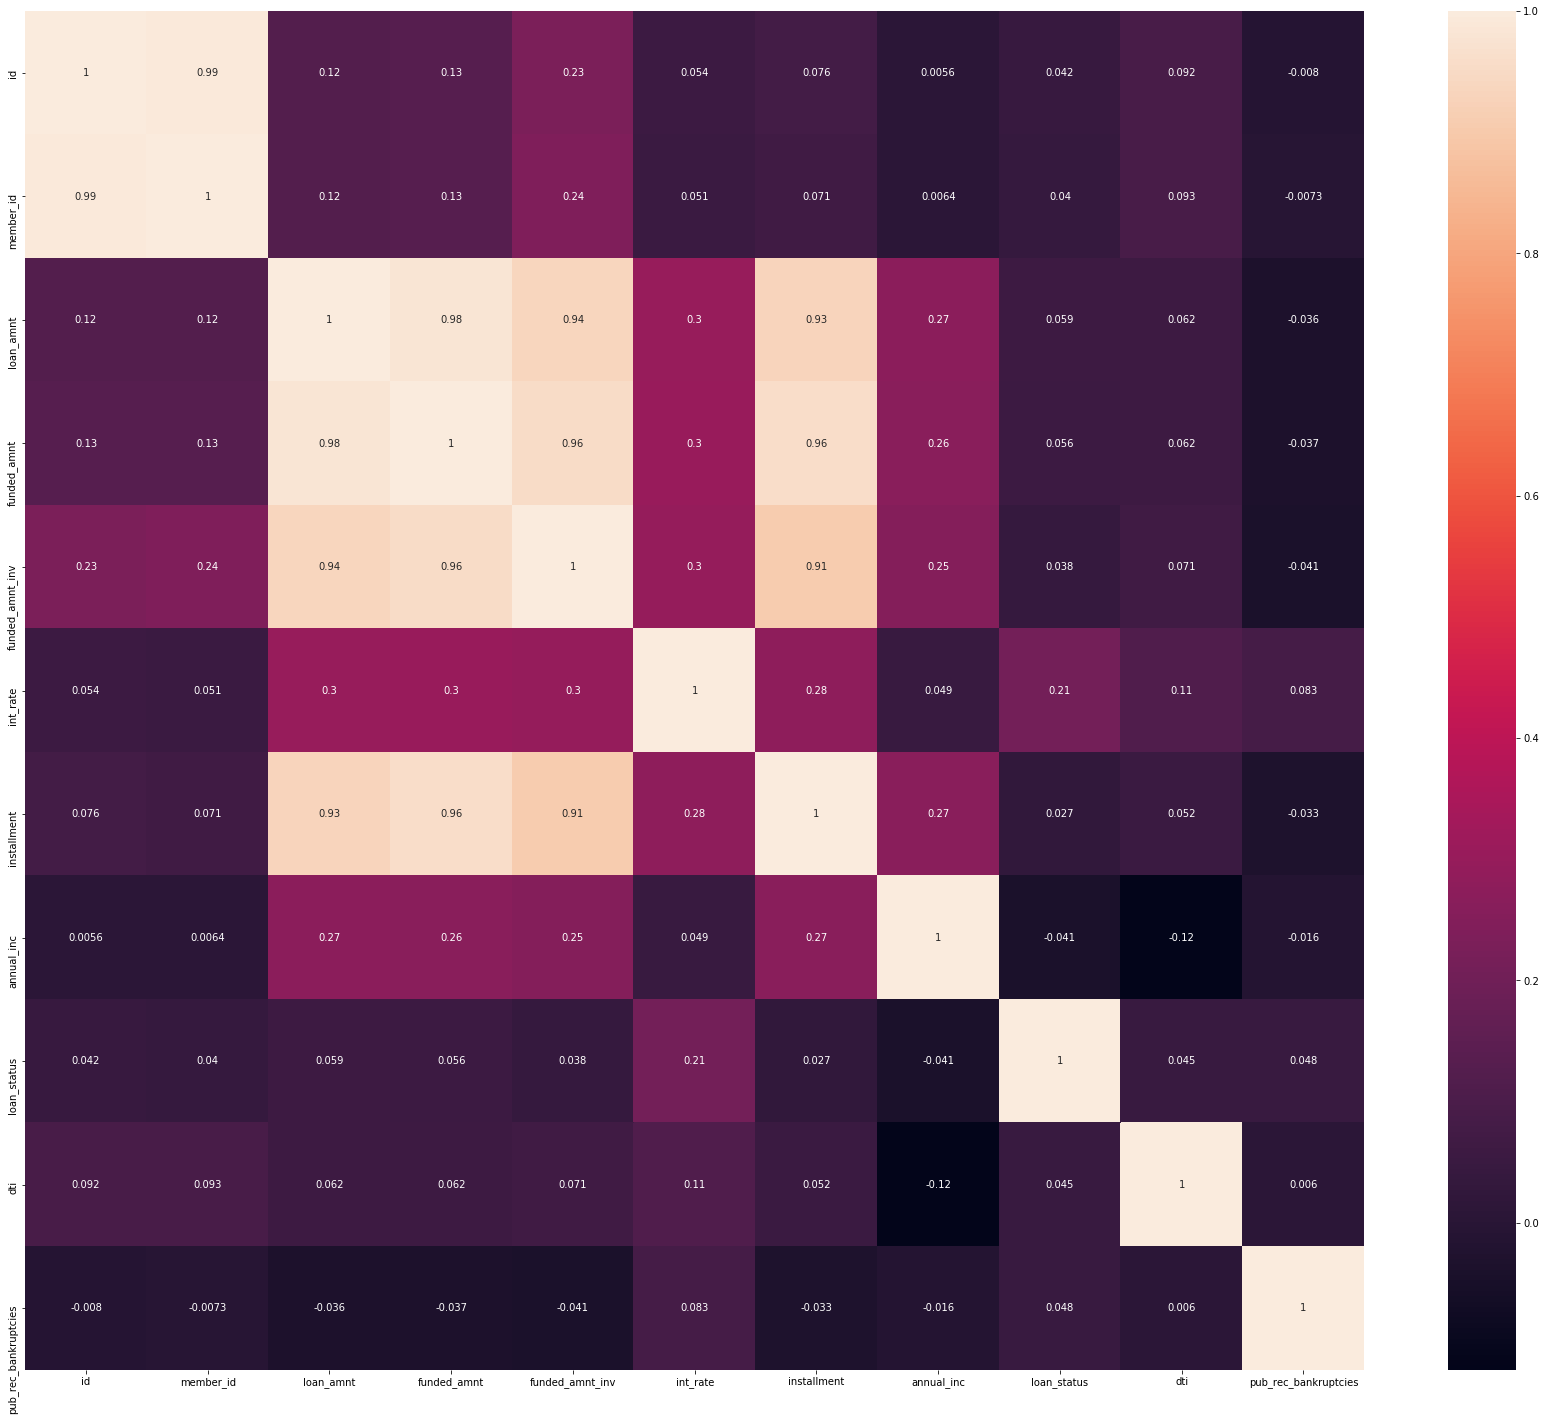

In [286]:
plt.figure(figsize=(30,25))
sns.heatmap(loan_clean_int.corr(),annot = True)
plt.show()


* **Above correelation matrix tells that there is a high correlation between id and member id, any one of them could be taken for further analysis**
* **Loan_amnt, funded_amnt, funded_amnt_inv and installment are highly correlated, any one of them can be taken for further analysis**
* **Loan_amt can be retained as the business objective of this case study is to for the approver to decide whether the loan should be given or not so loan_amt is the most important field out of the other highly correlated one stated in the above  point**


In [339]:
#Removing high correlated values to avoid multi collinearity
loan_clean_final = loan_clean_int.drop(['funded_amnt_inv','funded_amnt','installment','member_id'],axis=1)

# 3. Standardising Values

In [362]:
loan_clean_final.describe()

,id,loan_amnt,int_rate,annual_inc,loan_status,dti,pub_rec_bankruptcies
count,3.857700e+04,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,37880.000000
mean,6.763787e+05,11047.025430,11.932219,6.877797e+04,0.145864,13.272727,0.043479
std,2.092639e+05,7348.441646,3.691327,6.421868e+04,0.352975,6.673044,0.204583
min,5.473400e+04,500.000000,5.420000,4.000000e+03,0.000000,0.000000,0.000000
25%,5.120330e+05,5300.000000,8.940000,4.000000e+04,0.000000,8.130000,0.000000
50%,6.564230e+05,9600.000000,11.710000,5.886800e+04,0.000000,13.370000,0.000000
75%,8.291460e+05,15000.000000,14.380000,8.200000e+04,0.000000,18.560000,0.000000
max,1.077501e+06,35000.000000,24.400000,6.000000e+06,1.000000,29.990000,2.000000


**Insights**
* **From the above describe result we can see that fields such as loan_amnt, annual_inc , dti have very high volume and lot of results**
* **We can have categorical fields as well for them by creating bins for better analysis**

In [363]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount in term of 10Ks
loan_clean_final['annual_inc_range']=loan_clean_final['annual_inc']/10000
a = max(loan_clean_final['annual_inc']/10000)
bins = [0,1,2,3,4,5,6,7,8,9,10,a]
slot = ['0-10K','10K-20K', '20K-30K','30K-40K','40K-50K','50K-60K','60K-70K','70K-80K','80K-90K','90K-100K','100K Above']

loan_clean_final['annual_inc_range']=pd.cut(loan_clean_final['annual_inc_range'],bins,labels=slot)

In [364]:
loan_clean_final.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,annual_inc_range
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,AZ,27.65,0.0,20K-30K
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,GA,1.00,0.0,20K-30K
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,IL,8.72,0.0,10K-20K
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,CA,20.00,0.0,40K-50K
5,1075269,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,AZ,11.20,0.0,30K-40K


In [365]:
# Binning Numerical Columns to create a categorical column

# Creating bins for loan amount in term of 10Ks
loan_clean_final['loan_amnt_rng']=loan_clean_final['loan_amnt']/1000
a= max(loan_clean_final['loan_amnt']/1000)

bins = [0,2,4,6,8,a]
slot = ['0-2K','2K-4K', '4K-6K','6K-8K','10K Above']

loan_clean_final['loan_amnt_rng']=pd.cut(loan_clean_final['loan_amnt_rng'],bins,labels=slot)

In [366]:
loan_clean_final.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,annual_inc_range,loan_amnt_rng
0,1077501,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,AZ,27.65,0.0,20K-30K,4K-6K
1,1077430,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,GA,1.00,0.0,20K-30K,2K-4K
2,1077175,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,IL,8.72,0.0,10K-20K,2K-4K
3,1076863,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,CA,20.00,0.0,40K-50K,10K Above
5,1075269,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,AZ,11.20,0.0,30K-40K,4K-6K


In [367]:
#Binning Interest Rate

a=max(loan_clean_final.int_rate)
bins = [0,6,10,14,16,a]
slot = ['0-6','6-10', '10-14','14-16','16+']

loan_clean_final['int_rate_rng']=pd.cut(loan_clean_final['int_rate'],bins,labels=slot)

In [368]:
#Doing a check to see if binning is happening properly

loan_clean_final[loan_clean_final['int_rate'] > 16]

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,annual_inc_range,loan_amnt_rng,int_rate_rng
7,1072053,3000,36 months,18.64,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,0,car,CA,5.35,0.0,40K-50K,2K-4K,16+
8,1071795,5600,60 months,21.28,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,1,small_business,CA,5.55,0.0,30K-40K,4K-6K,16+
15,1069759,1000,36 months,16.29,D,D1,< 1 year,RENT,28000.00,Not Verified,Dec-11,0,debt_consolidation,MO,20.31,0.0,20K-30K,0-2K,16+
27,1069657,5000,60 months,16.77,D,D2,2 years,RENT,50004.00,Not Verified,Dec-11,1,other,PA,13.97,0.0,50K-60K,4K-6K,16+
42,1069314,3000,36 months,18.25,D,D5,9 years,MORTGAGE,65000.00,Not Verified,Dec-11,0,other,PA,17.39,0.0,60K-70K,2K-4K,16+
43,1060578,4400,36 months,16.77,D,D2,10+ years,RENT,55000.00,Not Verified,Dec-11,0,debt_consolidation,RI,20.01,0.0,50K-60K,4K-6K,16+
55,1069410,21000,60 months,19.91,E,E4,7 years,RENT,50000.00,Verified,Dec-11,1,debt_consolidation,WA,21.58,0.0,40K-50K,10K Above,16+
56,1068409,16000,60 months,19.91,E,E4,7 years,RENT,81000.00,Verified,Dec-11,0,credit_card,MA,20.52,0.0,80K-90K,10K Above,16+
59,1068945,7100,36 months,16.77,D,D2,1 year,MORTGAGE,33000.00,Verified,Dec-11,0,debt_consolidation,TX,24.00,0.0,30K-40K,6K-8K,16+
61,1068934,17500,60 months,17.27,D,D3,6 years,RENT,40000.00,Verified,Dec-11,0,small_business,CA,19.47,0.0,30K-40K,10K Above,16+


# 4. Finding Outliers



In [369]:
loan_clean_final.describe()

,id,loan_amnt,int_rate,annual_inc,loan_status,dti,pub_rec_bankruptcies
count,3.857700e+04,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,37880.000000
mean,6.763787e+05,11047.025430,11.932219,6.877797e+04,0.145864,13.272727,0.043479
std,2.092639e+05,7348.441646,3.691327,6.421868e+04,0.352975,6.673044,0.204583
min,5.473400e+04,500.000000,5.420000,4.000000e+03,0.000000,0.000000,0.000000
25%,5.120330e+05,5300.000000,8.940000,4.000000e+04,0.000000,8.130000,0.000000
50%,6.564230e+05,9600.000000,11.710000,5.886800e+04,0.000000,13.370000,0.000000
75%,8.291460e+05,15000.000000,14.380000,8.200000e+04,0.000000,18.560000,0.000000
max,1.077501e+06,35000.000000,24.400000,6.000000e+06,1.000000,29.990000,2.000000


**There are outliers in loan_amount, int_rate, annual_inc as there are wider gaps between 75% and max value**

In [370]:
outlier_col = ['loan_amnt','int_rate','annual_inc']

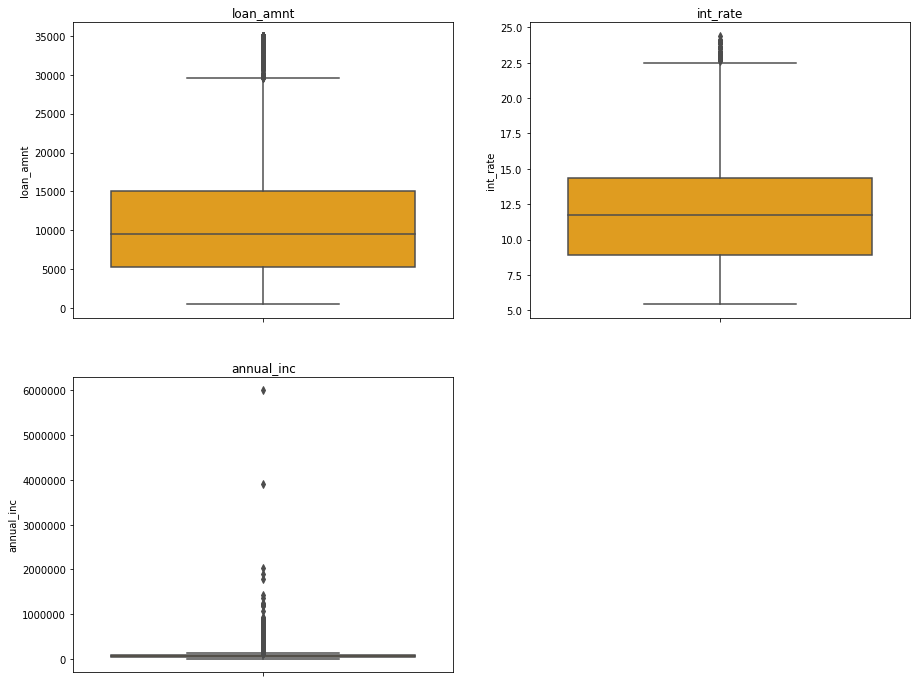

In [371]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = loan_clean_final[i], color = "orange")
    #plt.yticks(fontsize=8)
    plt.title(i)

**Insights**

* Loan amount and interest rate have some outliers
* Annual income has huge number of outliers, it means that for loan application there are few people  with very high income compared to common cohort

# 5. Data Analysis
## Univariate Analysis

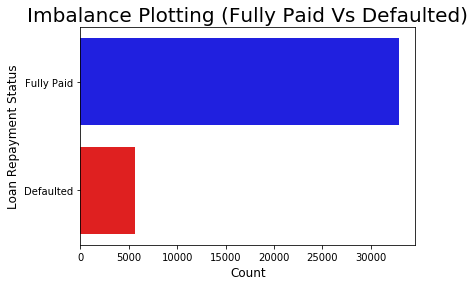

In [351]:
plt.figure()
sns.barplot(y=["Fully Paid","Defaulted"], x = loan_clean_final["loan_status"].value_counts(), palette = ["blue","red"])
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":12})
plt.xlabel("Count",fontdict = {"fontsize":12})
plt.title("Imbalance Plotting (Fully Paid Vs Defaulted)", fontdict = {"fontsize":20})
plt.show()

In [352]:
#Percentage with respect to defaulter and fully paid is given below 
fully_paid = round((loan_clean_final["loan_status"].value_counts()[0]/len(loan_clean_final)* 100),2)
print("Fully Paid Applicant Percentage is {}%".format(fully_paid))
defaluter = round((loan_clean_final["loan_status"].value_counts()[1]/len(loan_clean_final)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Fully paid to defaulter raatio is : {0:.2f}/1".format(fully_paid/defaluter))

Fully Paid Applicant Percentage is 85.41%
Defaulter Percentage is 14.59%
Fully paid to defaulter raatio is : 5.85/1


**Creating a user defined function which can be used for any univariate analysis**

* As we know that for a univariate analysis on Numerical Columns we can perform - distribution plot and for Categorical Columns we can do a count plot, thus the user defined function below automatically picks the variable identify its type and perform the analysis
* There is also a subplot in the function below which identifies the distribution of defaulters across the categorical variable, for a better comparison

In [353]:
# Creating a function to find if the fieldumn is categorical or numerical 

def check_type(input_data,field):
    if input_data[field].dtype == np.int64 or input_data[field].dtype == np.float64:
        return "numerical"
    else:
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def uni_analysis(input_data,field,target_field,ylog=False,x_label_angle=False,h_layout=True):
    if check_type(input_data,field) == "numerical":
        sns.distplot(input_data[field],hist=False)
        
        
    elif check_type(input_data,field) == "categorical":
        val_count = input_data[field].value_counts()
        df1 = pd.DataFrame({field: val_count.index,'count': val_count.values})
        
        
        default_percentage = input_data[[field, target_field]].groupby([field],as_index=False).mean()
        default_percentage[target_field] = default_percentage[target_field]*100
        default_percentage.sort_values(by=target_field,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (axis1, axis2) = plt.subplots(ncols=2, figsize=(14,7))
        else:
            fig, (axis1, axis2) = plt.subplots(nrows=2, figsize=(24,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=axis1, x=field, data=input_data, hue=target_field)
        axis1.set_title(field, fontsize = 15)
        axis1.legend(['Repayer','Defaulter'])
        axis1.set_xlabel(field,fontdict={'fontsize' : 12, 'fontweight' : 2})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=90)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=axis2, x = field, y=target_field, data=default_percentage)
        axis2.set_title("Defaulters % in "+field, fontsize = 15)    
        axis2.set_xlabel(field,fontdict={'fontsize' : 12, 'fontweight' : 2})
        axis2.set_ylabel(target_field,fontdict={'fontsize' : 12, 'fontweight' : 2})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=90)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            axis1.set_yscale('log')
            axis1.set_ylabel("Count (log)",fontdict={'fontsize' : 12, 'fontweight' : 2})
        else:
            axis1.set_ylabel("Count",fontdict={'fontsize' : 12, 'fontweight' : 2})

        
        plt.show()

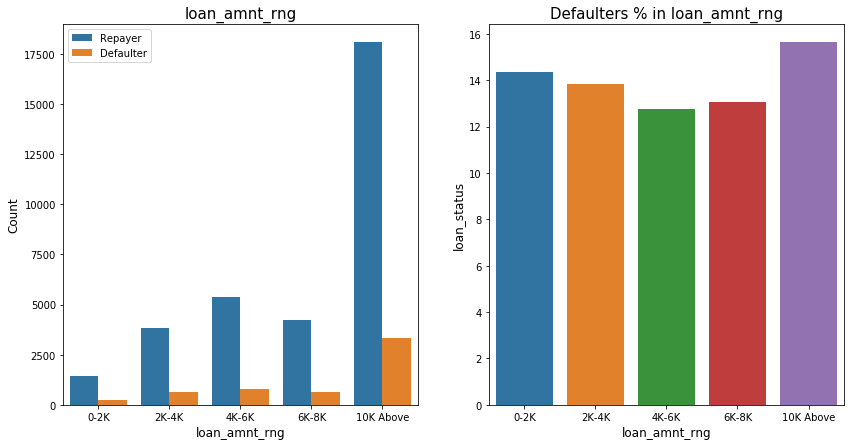

In [372]:
uni_analysis(loan_clean_final,"loan_amnt_rng","loan_status",False,False,True)

**Insights**
* Maximum number of loan applications are for loan amount >10k
* Defaulters are distributed more or less in the similar pattern  for all the loan amount ranges, however loan amount with >=10k has maximum default percentage around 16%

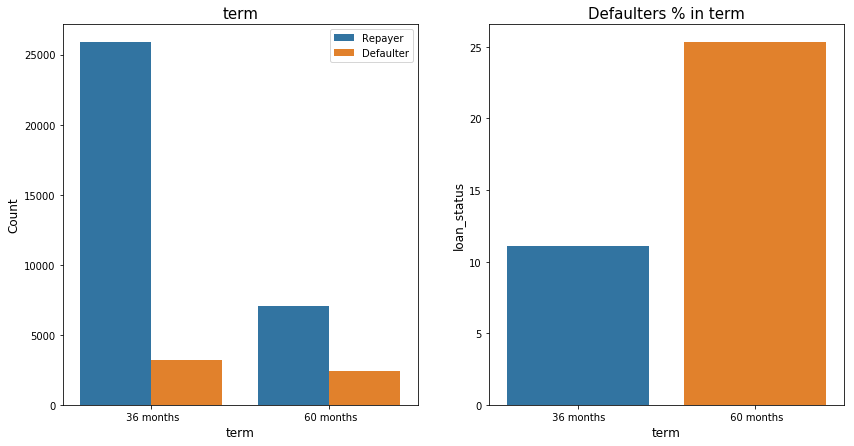

In [373]:
uni_analysis(loan_clean_final,"term","loan_status",False,False,True)

**Insights**
* Maximum  loan applications are for 36 months term around 75%
* For 36 months term repayment is more than 60 months term
* 25% of the defaults are happening in 60 months term

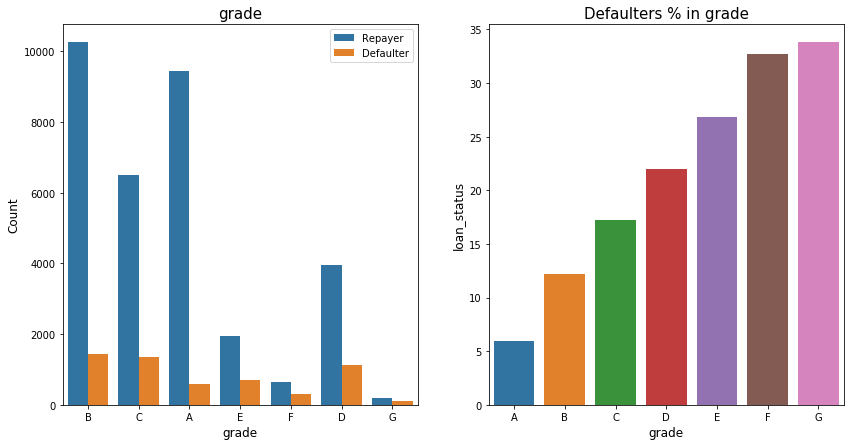

In [355]:
uni_analysis(loan_clean_final,"grade","loan_status",False,False,True)

**Insights**
* Grade B,C and A have more repayments
* Grade A&B contributes to more than 50% of the total loan applications
* Grade F&G shows high default percentage of more than 30%

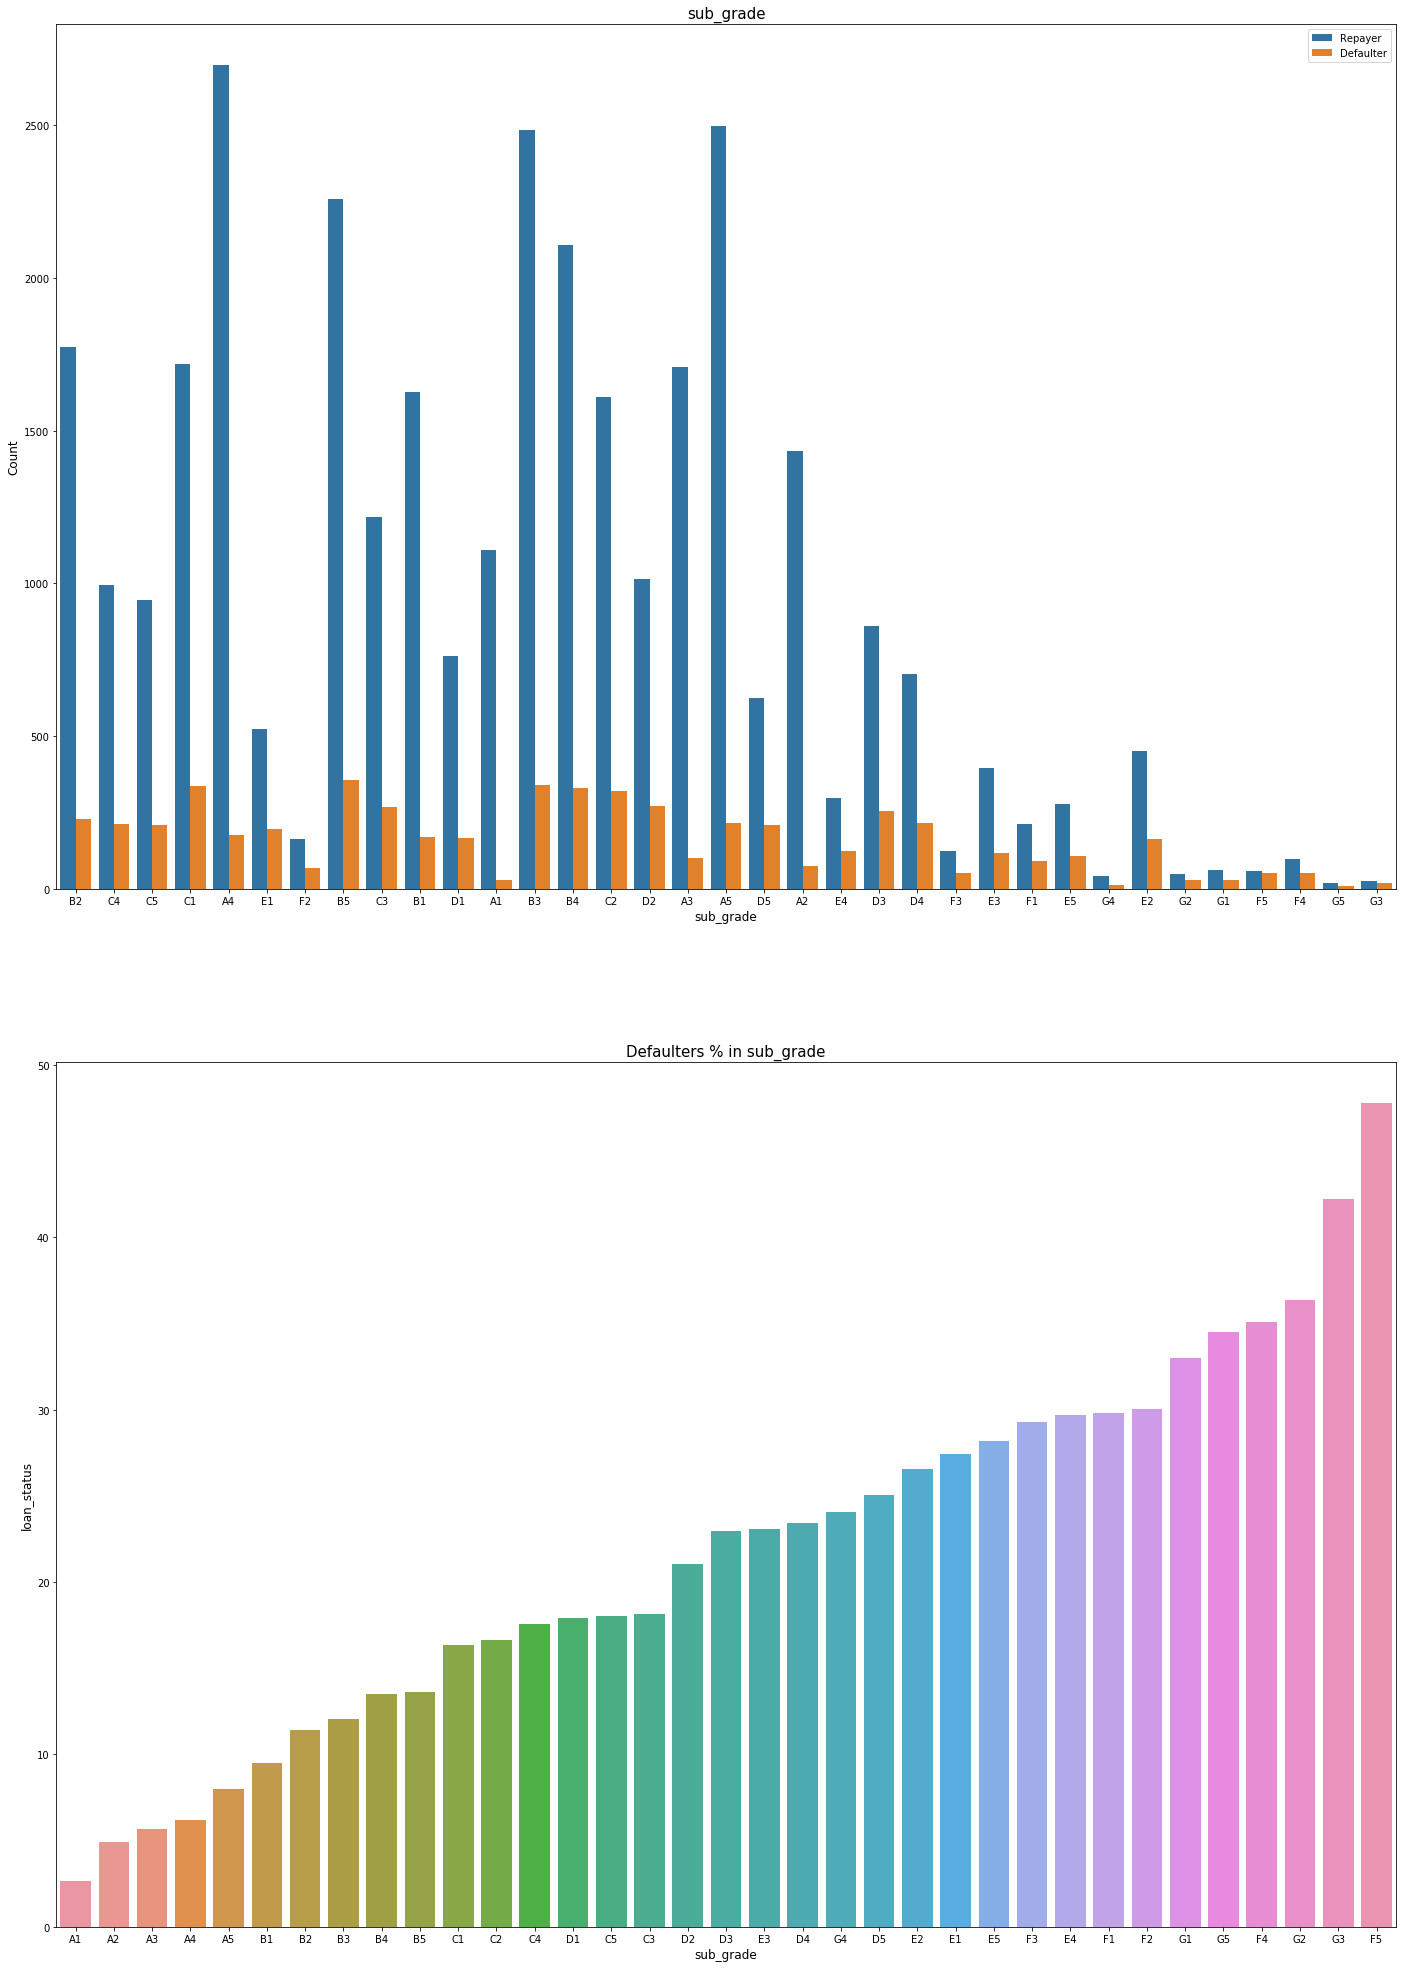

In [356]:
uni_analysis(loan_clean_final,"sub_grade","loan_status",False,False,False)

**Insights**
* Maximum repayment is happening in sub-grade A4, B3 & A5
* Maximum default is happening in  sub-grade in G3(~40%) & F5(~50%)

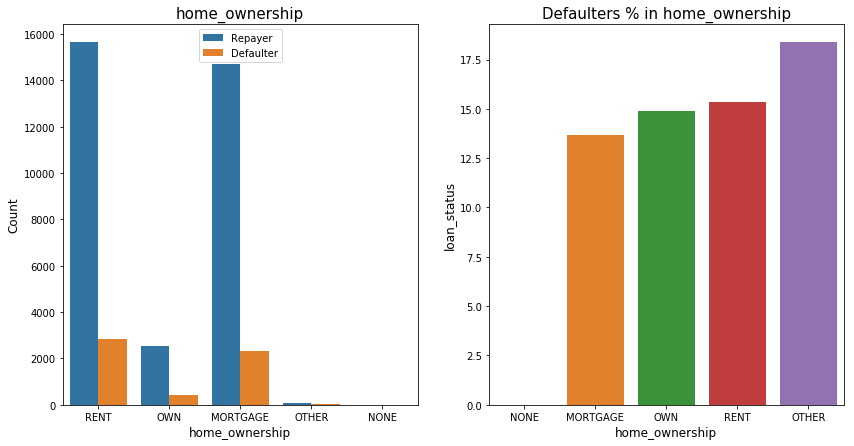

In [374]:

uni_analysis(loan_clean_final,"home_ownership","loan_status",False,False,True)

**Insights**

* A lot loan applications does have  home_ownership either rent or mortgage
* Maximum repayment also happens in Rent or Mortgage category
* When home owner ship is other then the chances of default is maximum`around 17%

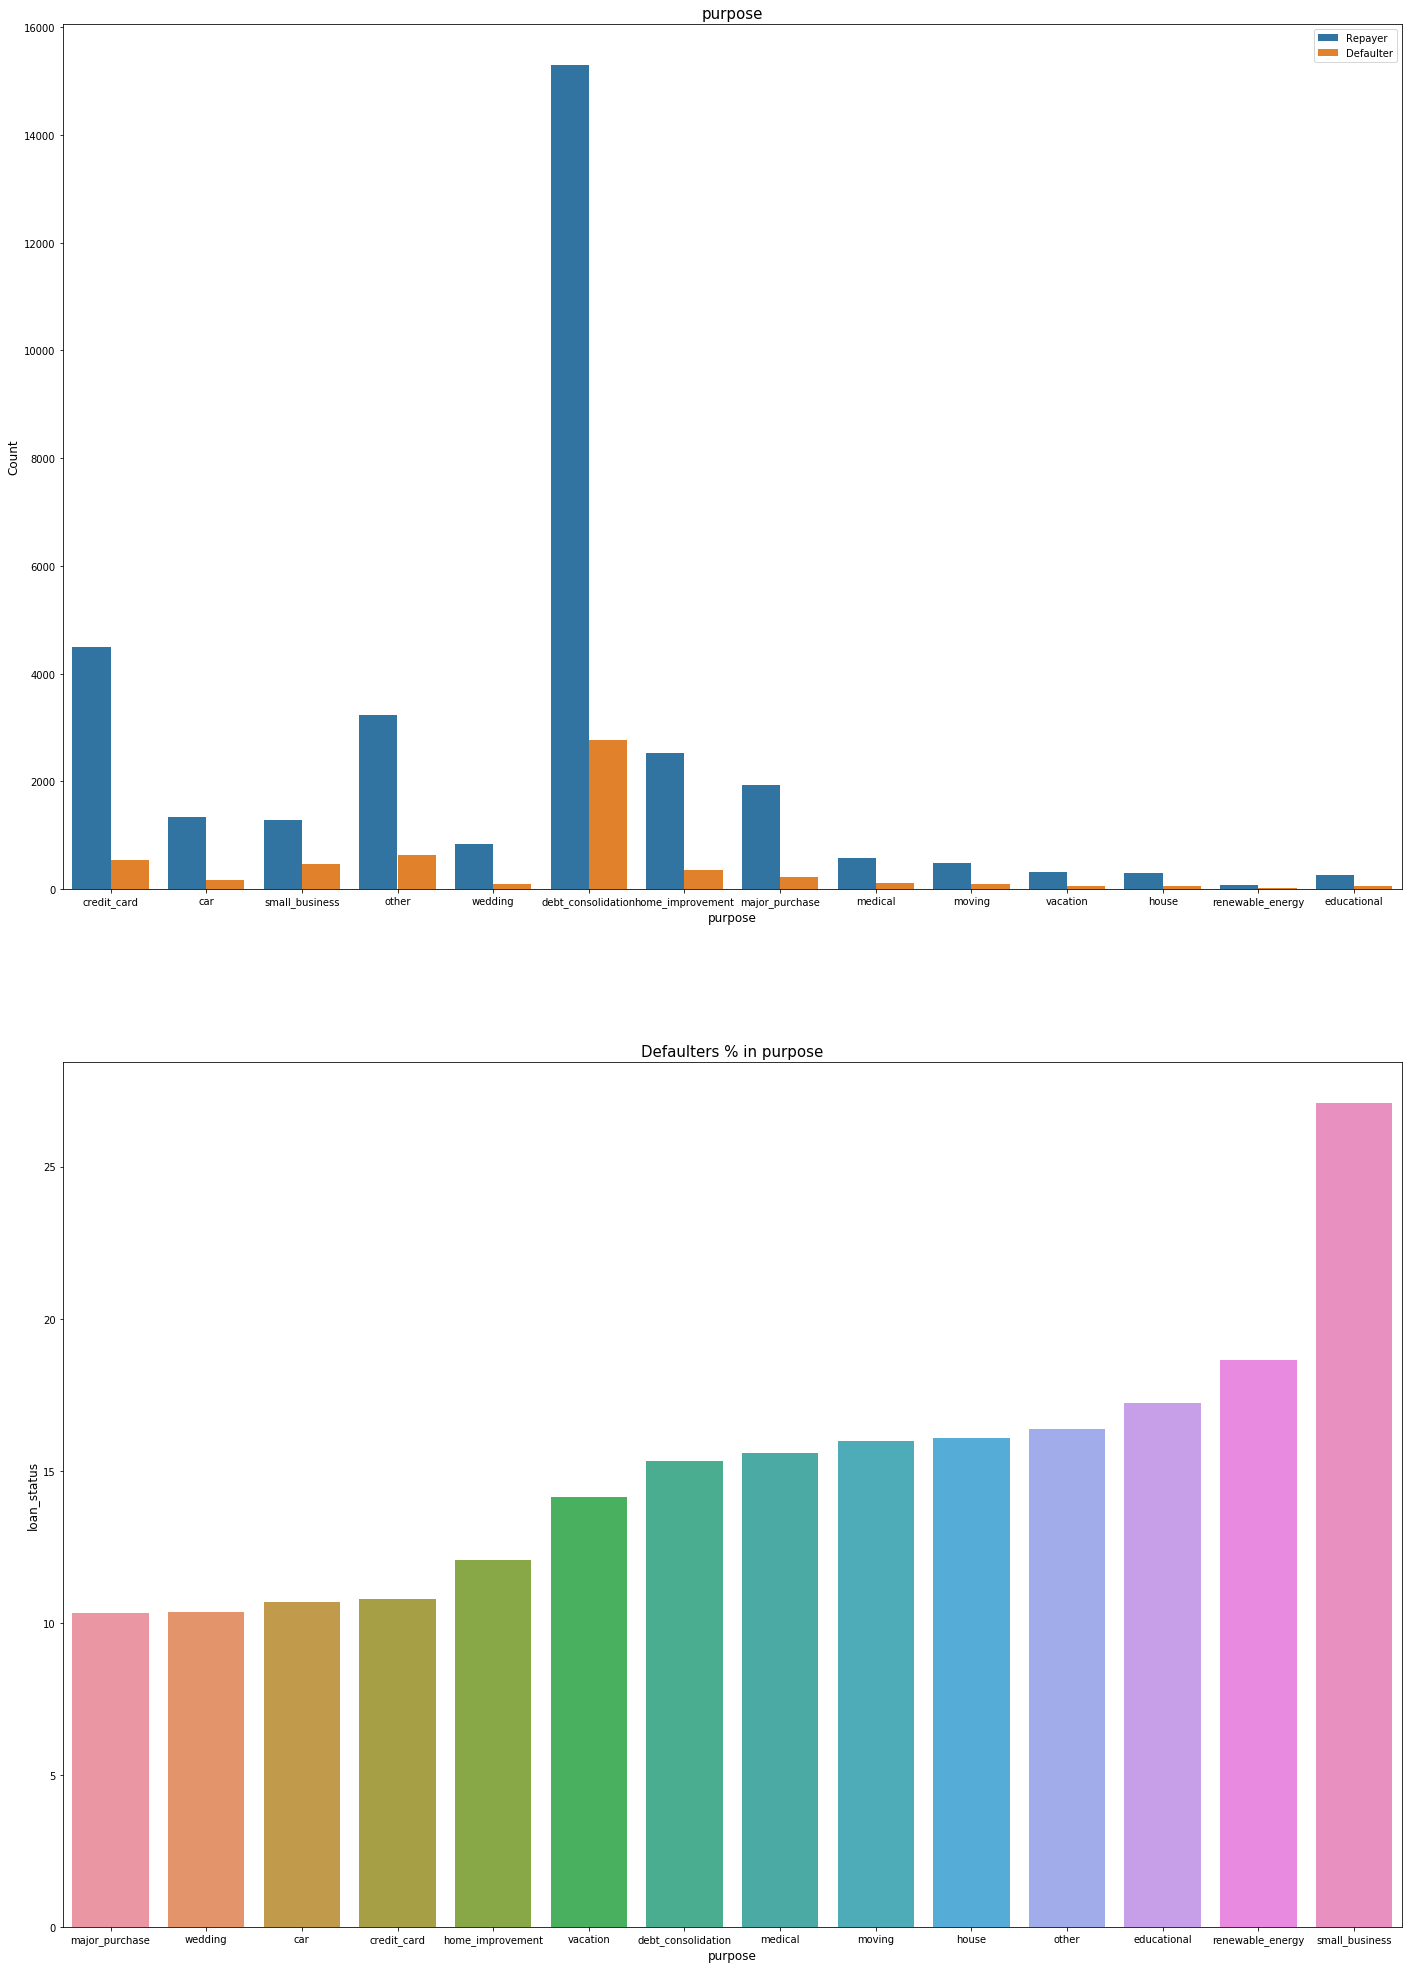

In [358]:

uni_analysis(loan_clean_final,"purpose","loan_status",False,False,False)

**Insights**
* Highest loan applications are for the purpose of debt clearance
* 25% of loan given for small businesses are getting defaulted followed by ~18% default for the purpose of renewable energy 

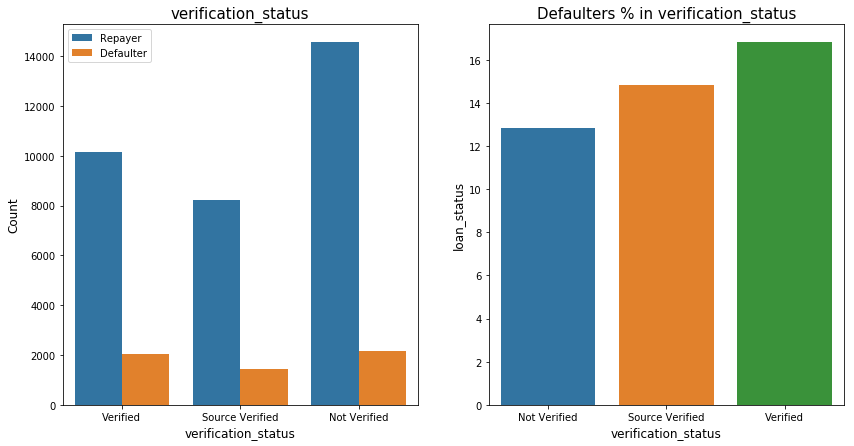

In [375]:
uni_analysis(loan_clean_final,"verification_status","loan_status",False,False,True)

**Insights**
* Highest number of loan are given to not verified applicants
* Around 16% of the loan get defaulted when the verification status is = Verified

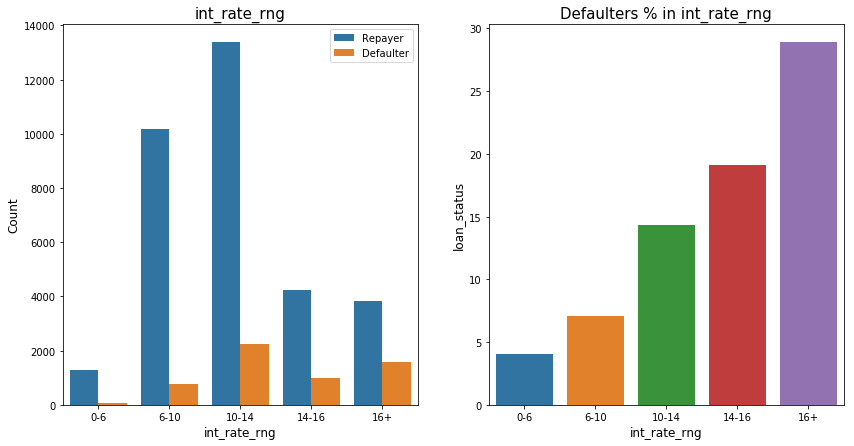

In [376]:
uni_analysis(loan_clean_final,"int_rate_rng","loan_status",False,False,True)

**Insights**
* Maximum loans(~41%) are given in the category of int_range 10-14%
* Around 30% loan given at a 16+ interest rate are getting defaulted

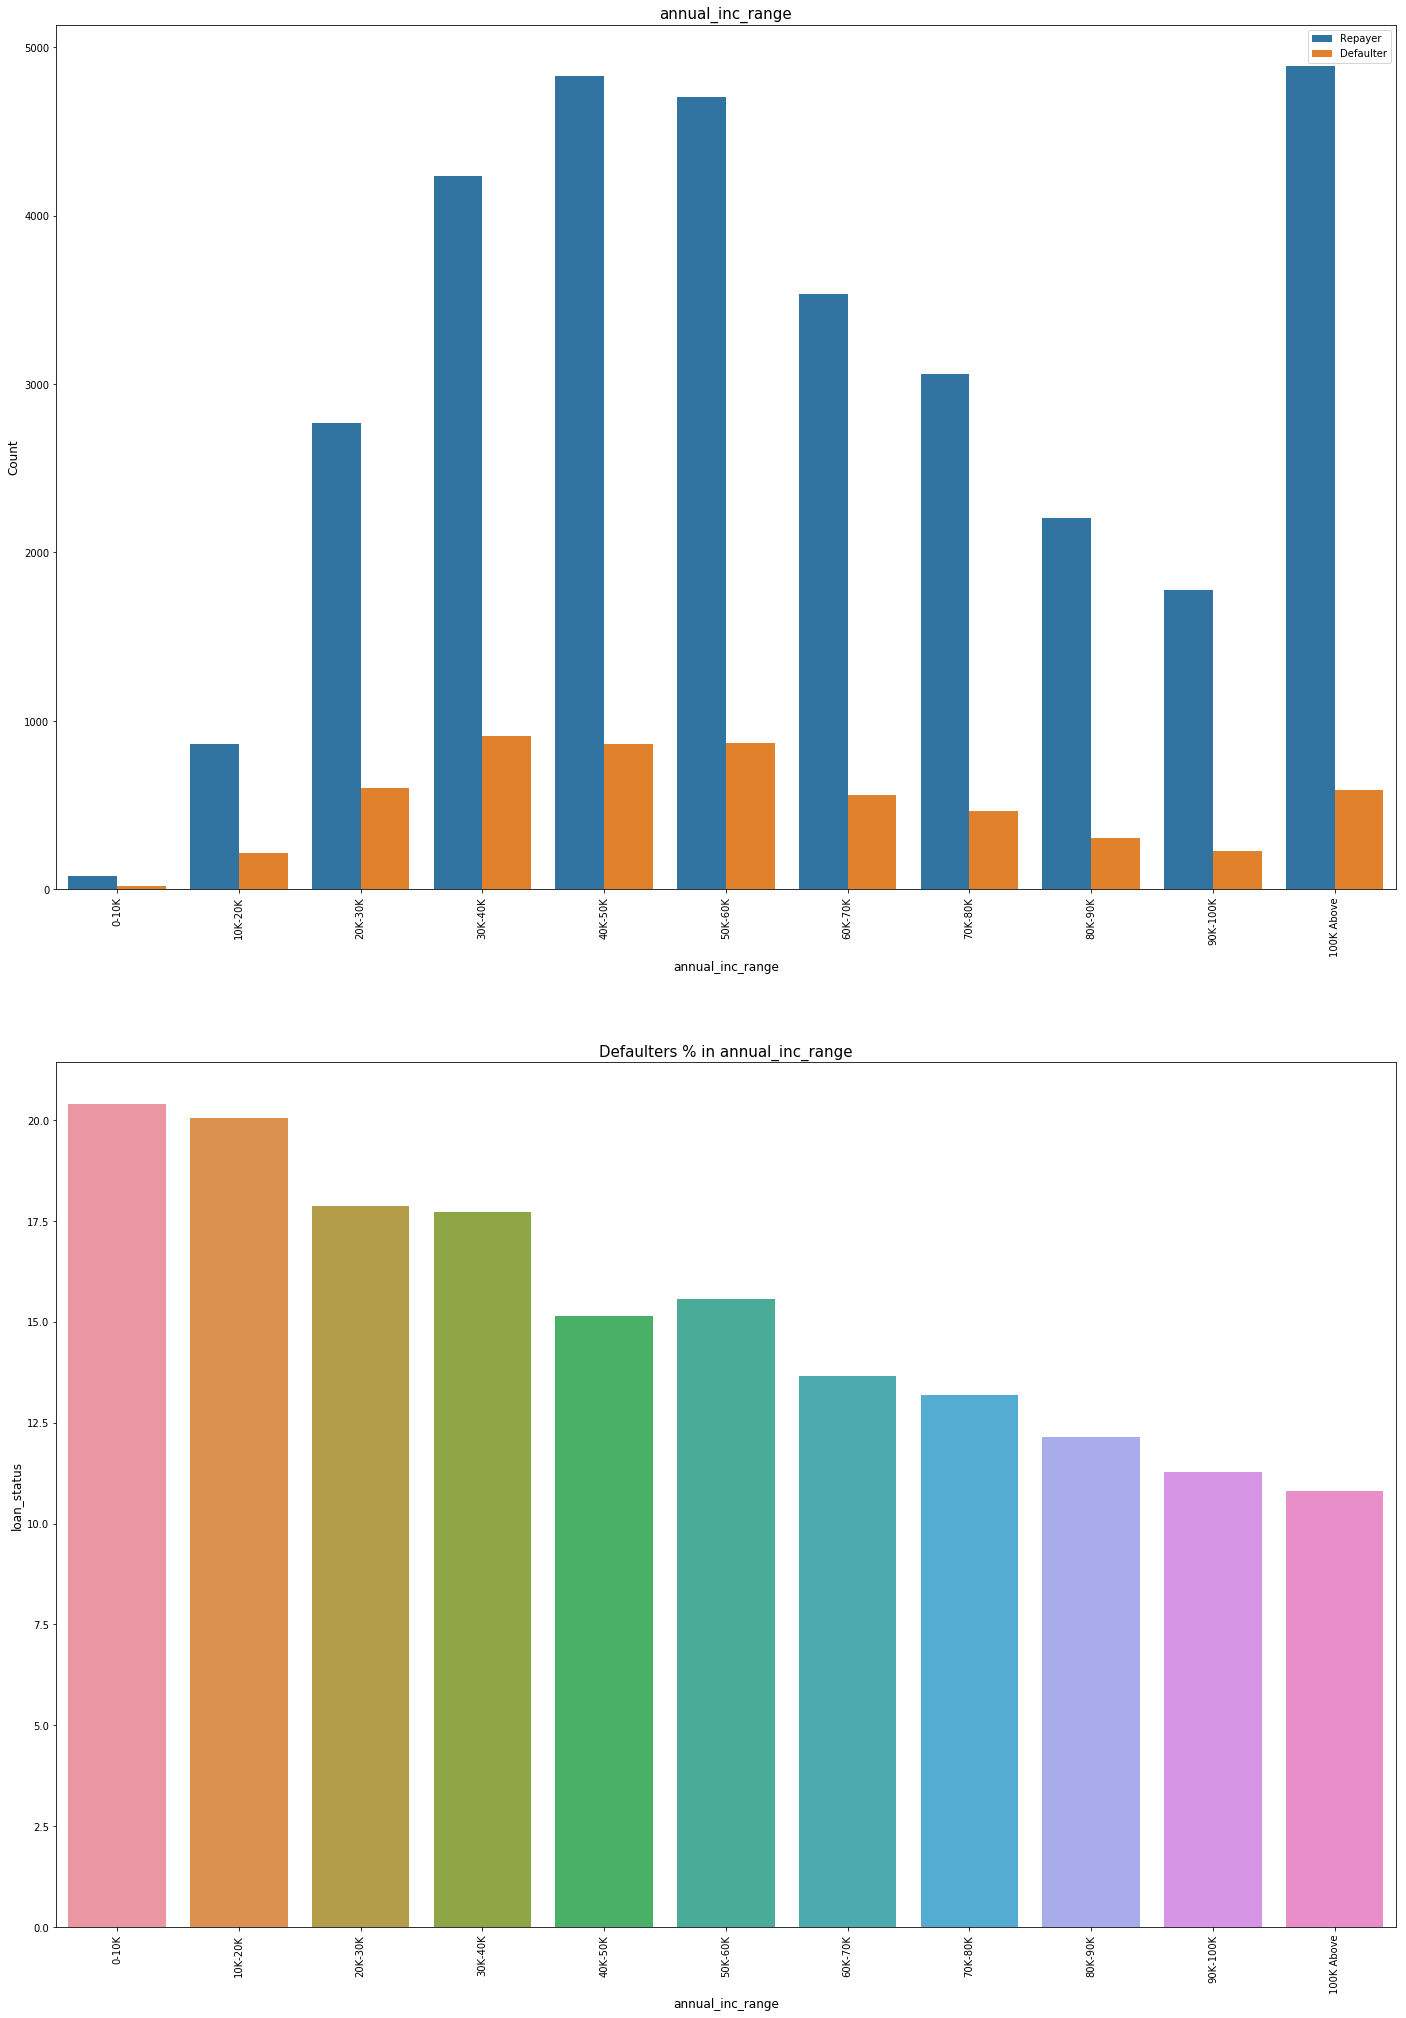

In [378]:
uni_analysis(loan_clean_final,"annual_inc_range","loan_status",False,True,False)

**Insights**
* Almost 50% of the loans are givenn to applicants in  3 ranges of income - 40-50k, 50-60k and 100k and above
* Highest defaulters with 20% default rate each are applicants with annual income range between - 0-10k and 10k-20k

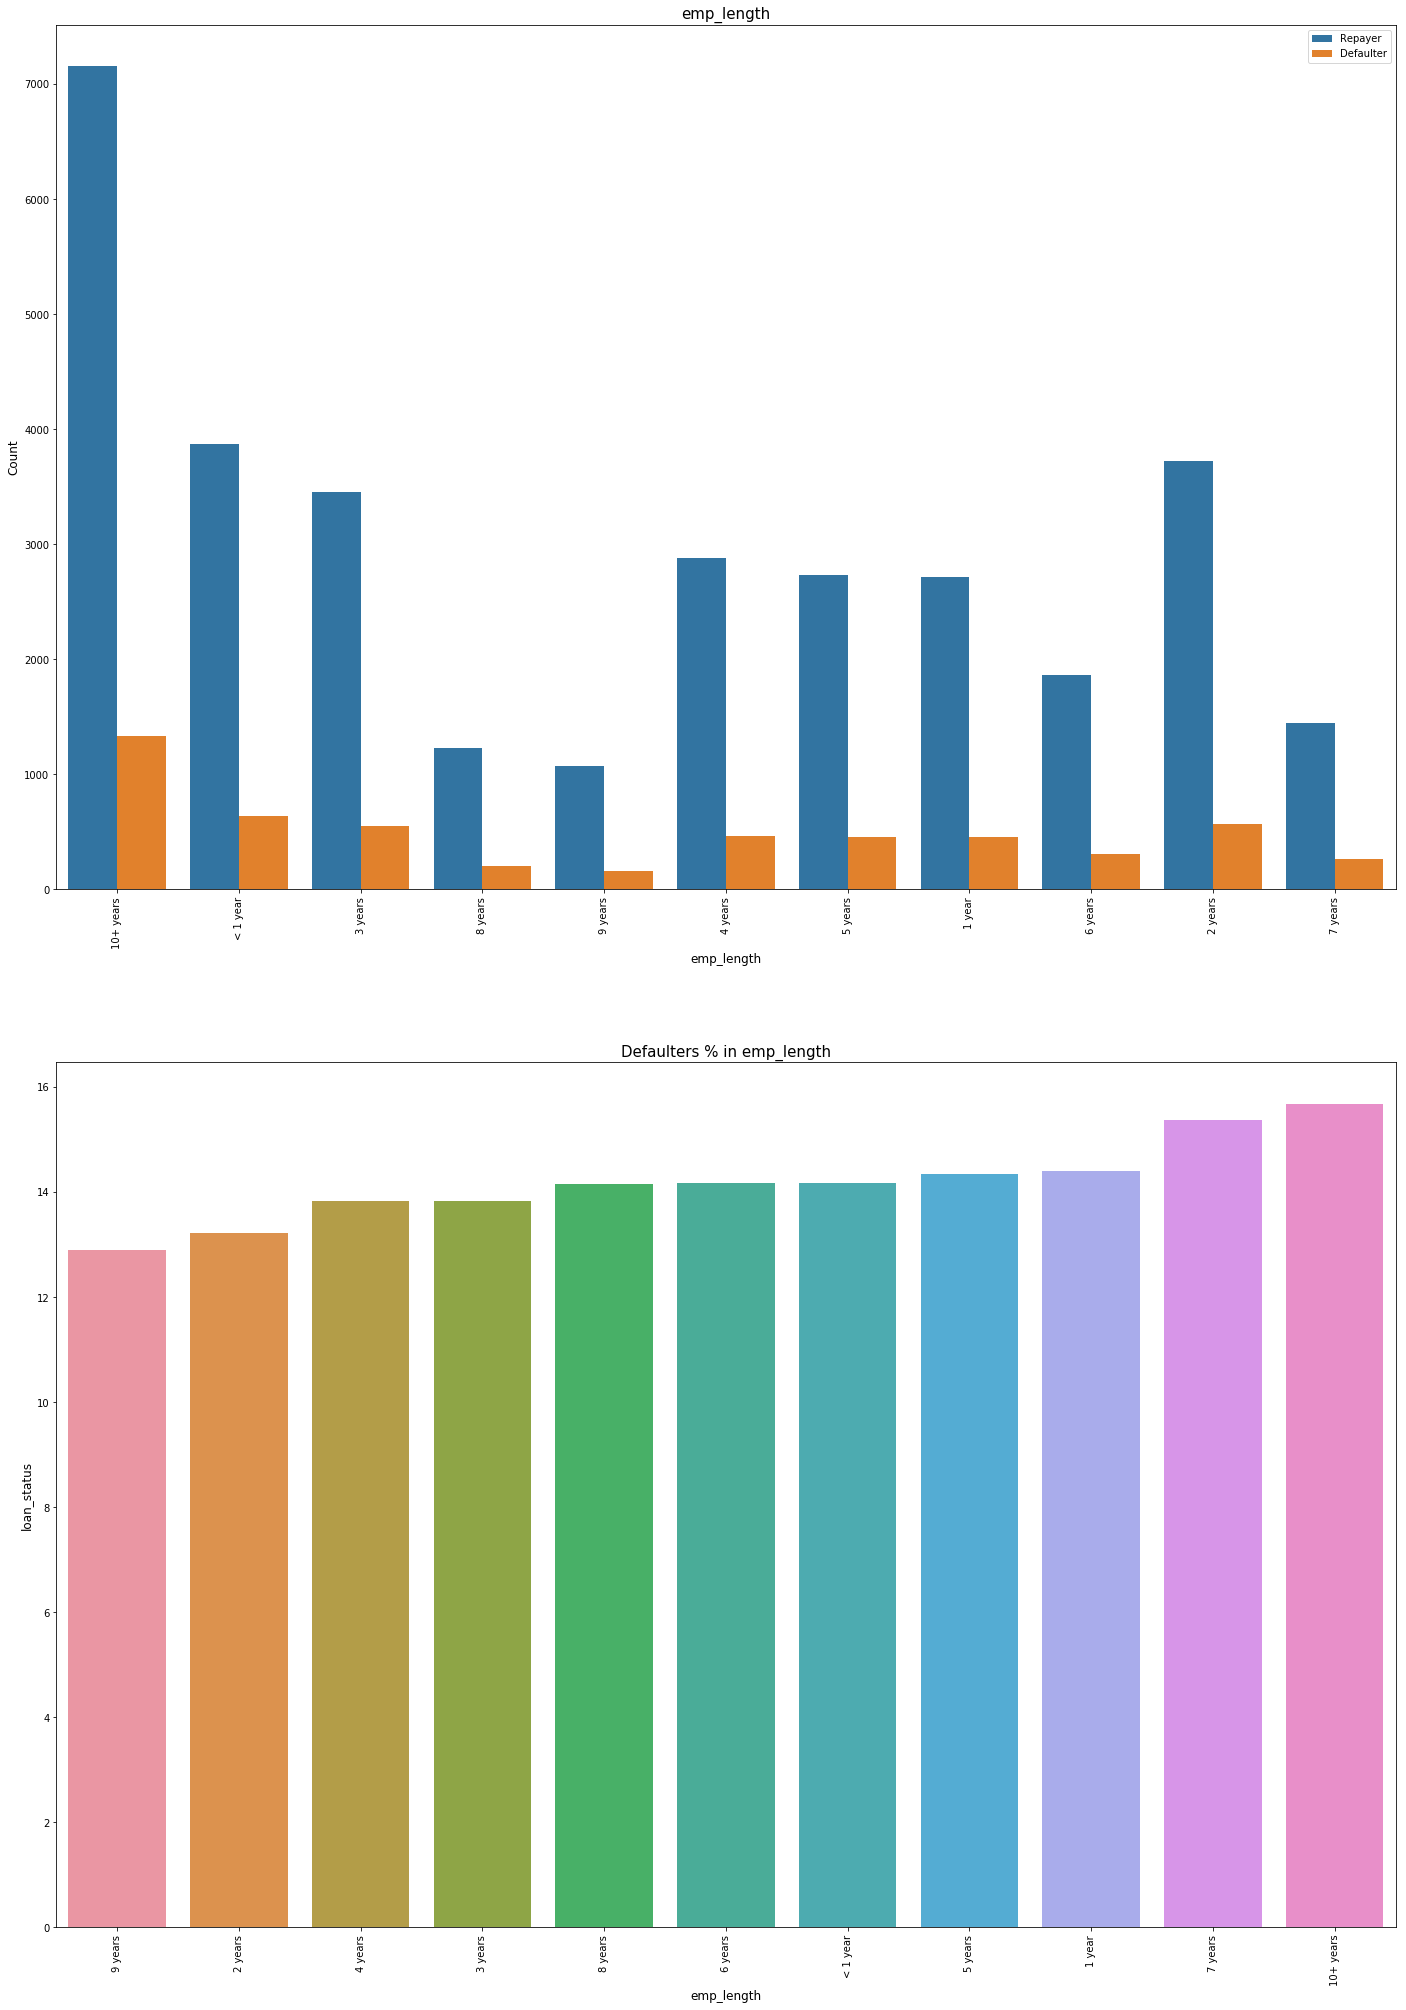

In [379]:
uni_analysis(loan_clean_final,"emp_length","loan_status",False,True,False)

**Inisghts**
* Around 20% applicants have emp  length of 10+ years
* Around 16% of the applicants with employment length of 10+ years are defaulting

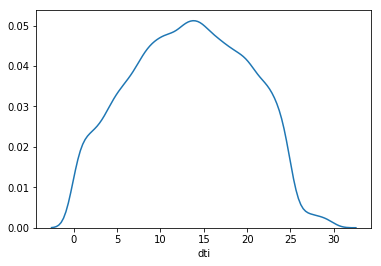

In [338]:
uni_analysis(loan_clean_final,"dti","loan_status",False,True,False)

**Insights**
* Dti is normally distributed
* 5% of the loan applications have 15% of dti

# Bi-variate Analysis

In [322]:
loan_fully_paid = loan_clean_final[loan_clean_final.loan_status== 0].drop(["loan_status"],axis=1)
loan_defaulted = loan_clean_final[loan_clean_final.loan_status== 1].drop(["loan_status"],axis=1)

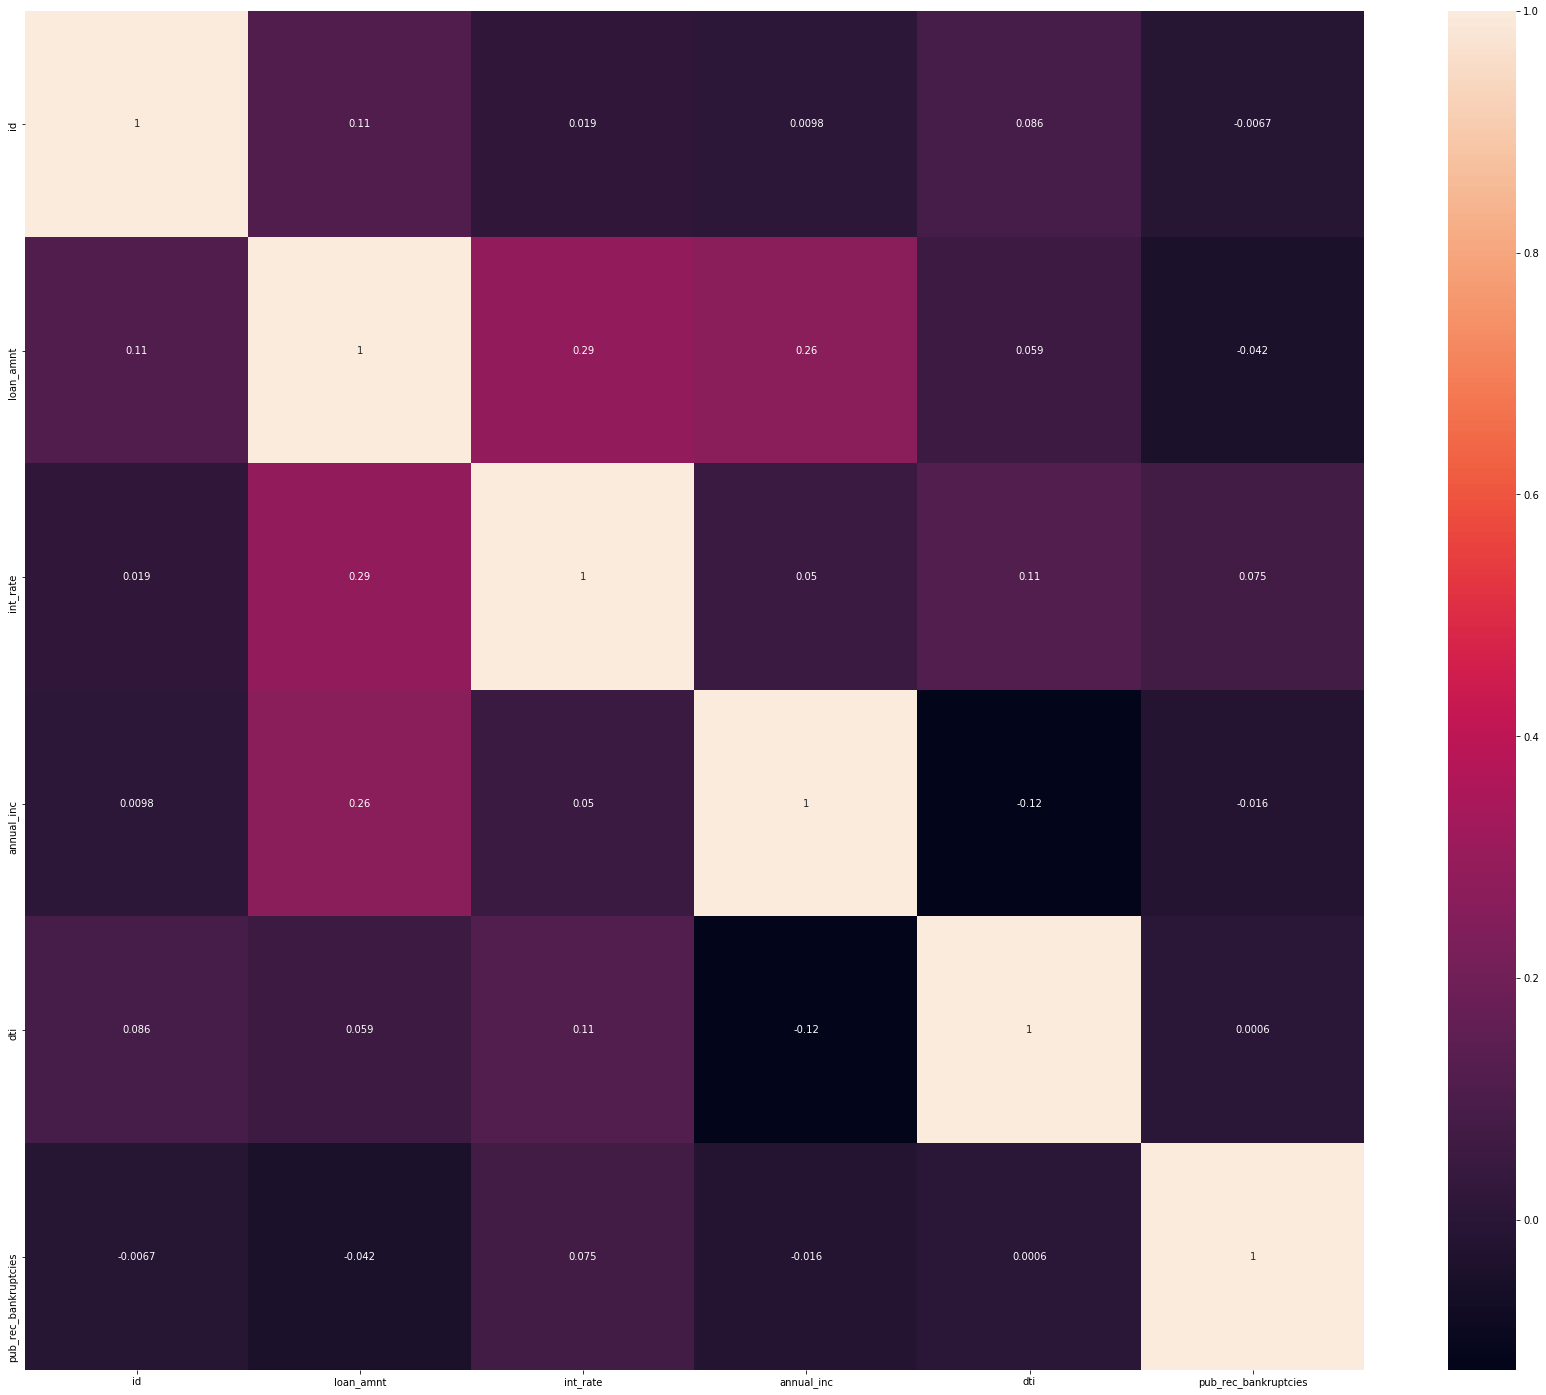

In [323]:
plt.figure(figsize=(30,25))
sns.heatmap(loan_fully_paid.corr(),annot = True)
plt.show()

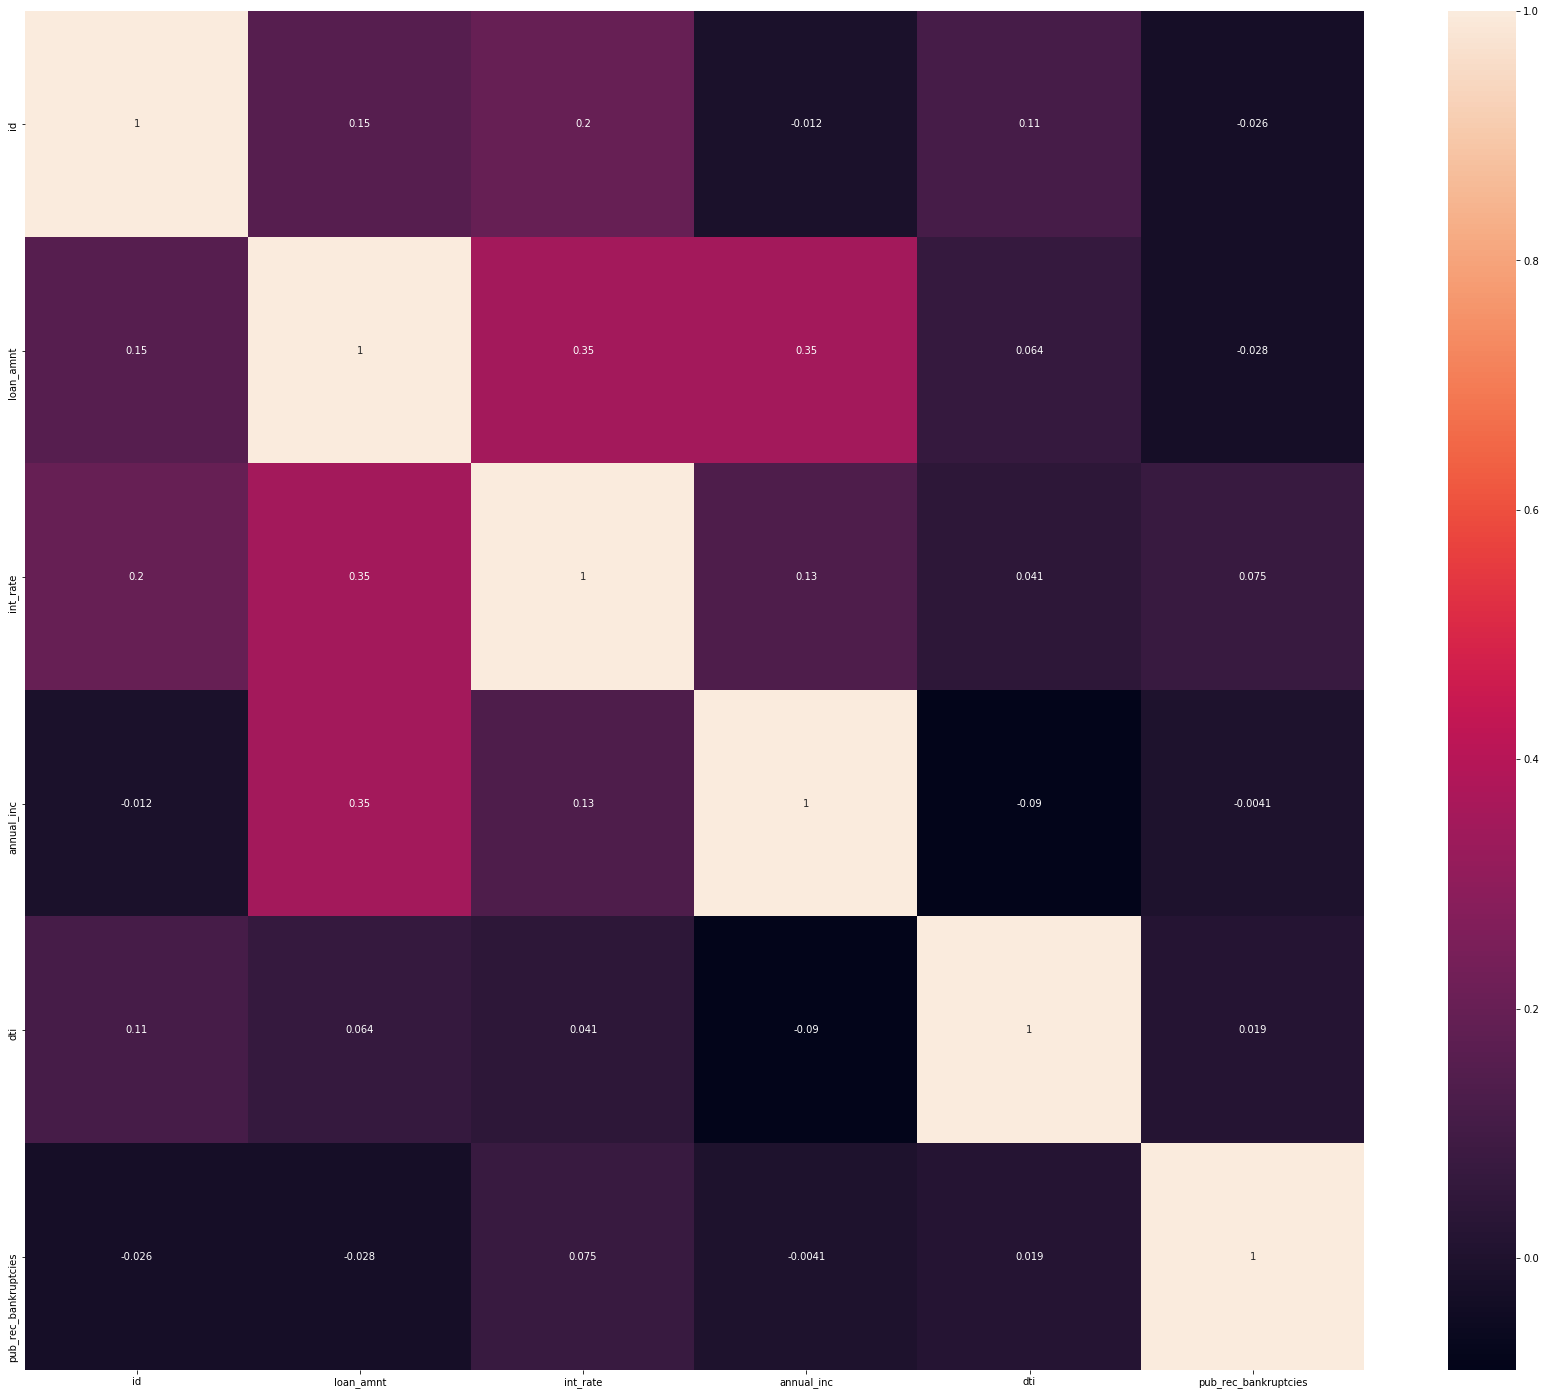

In [324]:
plt.figure(figsize=(30,25))
sns.heatmap(loan_defaulted.corr(),annot = True)
plt.show()

**Insights**
* There is not much co-relation between the numecial variable
* However there is a little co-relation between interest rate and annual income

# 6. Conclusion & Recommendation
* **Loan Amount should be taken into factor as we saw higher loan amount leads to more defaulters**
* **Term length of the loan can be kept shorter, we have observed higher defaults when term length is 60 months**
* **Grade F&G have higher default percentage, going deeper we saw that sub-grades G3 and F5 have the highest defaults, grades and sub-grades should be taken into account while approving loan**
* **Verification should be done thoroughly, we have observed higher default% even if the verification status = "Verified"**
* **Interest Rate can be optimized, 10-14% looks best for the business, interest rate > 16% tends to more defaults in the loan**
* **Annual income Range with <20K shows maximum default, annual income range should be one of the parameter for approving loan**
* **Applicants with 10+ years of experience shows more default, if the emloyments length increases drastically then the chances of defaulting the loan increases**